In [7]:
# import requests
# from bs4 import BeautifulSoup
# import pandas as pd
# import time

# # Number of pages to scrape (each page ~15 jobs)
# num_pages = 50  # Increase this number for more data

# base_url = "https://wuzzuf.net/search/jobs/"
# params = {
#     "a": "navbl",  # Optional, part of the site URL
#     "q": "Data Analyst"
# }

# all_jobs = []

# for page in range(num_pages):
#     print(f"📄 Scraping page {page + 1}...")
#     response = requests.get(base_url + f"?start={page}", params=params)
#     soup = BeautifulSoup(response.text, "html.parser")

#     job_cards = soup.find_all("div", class_="css-1gatmva e1v1l3u10")

#     if not job_cards:
#         print("❌ No jobs found on this page or possibly blocked.")
#         continue

#     for job in job_cards:
#         try:
#             title = job.find("h2").text.strip()
#         except:
#             title = "Not found"

#         try:
#             company = job.find("a", class_="css-17s97q8").text.strip()
#         except:
#             company = "Not found"

#         try:
#             location = job.find("span", class_="css-5wys0k").text.strip()
#         except:
#             location = "Not found"

#         try:
#             skills = job.find("div", class_="css-y4udm8").text.strip()
#         except:
#             skills = "Not found"

#         try:
#             link = "https://wuzzuf.net" + job.find("a")["href"]
#         except:
#             link = "Not found"

#         job_data = {
#             "Job Title": title,
#             "Company": company,
#             "Location": location,
#             "Skills": skills,
#             "Link": link
#         }

#         all_jobs.append(job_data)

#     time.sleep(1.5)  # Be respectful to the server

# # Save data to CSV and Excel
# df = pd.DataFrame(all_jobs)
# df.to_csv("wuzzuf_jobs_data.csv", index=False)
# df.to_excel("wuzzuf_jobs_data.xlsx", index=False)

# print(f"✅ Scraping finished! Total jobs collected: {len(df)}")

📄 Scraping page 1...
📄 Scraping page 2...
📄 Scraping page 3...
📄 Scraping page 4...
📄 Scraping page 5...
📄 Scraping page 6...
📄 Scraping page 7...
📄 Scraping page 8...
📄 Scraping page 9...
📄 Scraping page 10...
📄 Scraping page 11...
📄 Scraping page 12...
❌ No jobs found on this page or possibly blocked.
📄 Scraping page 13...
❌ No jobs found on this page or possibly blocked.
📄 Scraping page 14...
❌ No jobs found on this page or possibly blocked.
📄 Scraping page 15...
❌ No jobs found on this page or possibly blocked.
📄 Scraping page 16...
❌ No jobs found on this page or possibly blocked.
📄 Scraping page 17...
❌ No jobs found on this page or possibly blocked.
📄 Scraping page 18...
❌ No jobs found on this page or possibly blocked.
📄 Scraping page 19...
❌ No jobs found on this page or possibly blocked.
📄 Scraping page 20...
❌ No jobs found on this page or possibly blocked.
📄 Scraping page 21...
❌ No jobs found on this page or possibly blocked.
📄 Scraping page 22...
❌ No jobs found on this p

# Import required libraries

In [6]:
import pandas as pd
import numpy as np
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset

In [9]:
data = pd.read_csv("wuzzuf_jobs_data.csv")

In [11]:
# copy data
df=data.copy()

# Data Cleaning

In [14]:
# preview the dataset
df.head()

,Job Title,Company,Location,Skills,Link
0,Data Analyst,Helal Group -,"New Cairo, Cairo, Egypt",Full TimeOn-siteExperienced · 3 - 5 Yrs of Exp...,https://wuzzuf.nethttps://wuzzuf.net/jobs/care...
1,Data Analyst,New Egypt Gold -,"Qalubia, Egypt",Full TimeOn-siteEntry Level · 1 - 3 Yrs of Exp...,https://wuzzuf.nethttps://wuzzuf.net/jobs/care...
2,Project Listing Specialist & Data Analyst for ...,armonia vita -,"Mansoura, Dakahlia, Egypt",Full TimeOn-siteEntry Level · 1 - 3 Yrs of Exp...,https://wuzzuf.nethttps://wuzzuf.net/jobs/care...
3,Data Analyst,Bnaia -,"Maadi, Cairo, Egypt",Full TimeOn-siteExperienced · 2 - 5 Yrs of Exp...,https://wuzzuf.nethttps://wuzzuf.net/jobs/care...
4,Data Analyst,Carina Wear -,"New Cairo, Cairo, Egypt",Full TimeOn-siteEntry Level · 1+ Yrs of Exp · ...,https://wuzzuf.nethttps://wuzzuf.net/jobs/care...


In [16]:
df.shape

(153, 5)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Job Title  153 non-null    object
 1   Company    153 non-null    object
 2   Location   153 non-null    object
 3   Skills     153 non-null    object
 4   Link       153 non-null    object
dtypes: object(5)
memory usage: 6.1+ KB


In [20]:
# check for duplicate
df.duplicated().sum()

0

In [22]:
# Clean and extract all skills from the "Skills" column (dot-separated)
all_skills = []
cleaned_skills = []
for skill_list in df["Skills"]:
    all_skills.extend([skill.strip() for skill in skill_list.split("·")])
    cleaned_skills.append(all_skills)
    
df["Skills_Cleaned"] = cleaned_skills

In [24]:
df["Skills_Cleaned"]

0      [Full TimeOn-siteExperienced, 3 - 5 Yrs of Exp...
1      [Full TimeOn-siteExperienced, 3 - 5 Yrs of Exp...
2      [Full TimeOn-siteExperienced, 3 - 5 Yrs of Exp...
3      [Full TimeOn-siteExperienced, 3 - 5 Yrs of Exp...
4      [Full TimeOn-siteExperienced, 3 - 5 Yrs of Exp...
                             ...                        
148    [Full TimeOn-siteExperienced, 3 - 5 Yrs of Exp...
149    [Full TimeOn-siteExperienced, 3 - 5 Yrs of Exp...
150    [Full TimeOn-siteExperienced, 3 - 5 Yrs of Exp...
151    [Full TimeOn-siteExperienced, 3 - 5 Yrs of Exp...
152    [Full TimeOn-siteExperienced, 3 - 5 Yrs of Exp...
Name: Skills_Cleaned, Length: 153, dtype: object

In [28]:
#  Extract Job Level using Regex
def infer_level(title):
    title = str(title).lower()
    if re.search(r'\bsenior\b', title):
        return "Senior"
    elif re.search(r'\bjunior\b', title):
        return "Junior"
    else:
        return "Mid"

In [30]:
df["Level"] = df["Job Title"].apply(infer_level)

In [38]:
# Extract City from Location using Regex
def extract_city(location):
    match = re.search(r'^([^,]+)', str(location))
    return match.group(1).strip() if match else None

In [40]:
df["City"] = df["Location"].apply(extract_city)

In [44]:
# 2. Count frequency of each skill
skill_counts = Counter(all_skills)
top_skills = skill_counts.most_common(10)

In [46]:
top_skills

[('Analyst/Research', 97),
 ('Full TimeOn-siteExperienced', 74),
 ('Analysis', 46),
 ('IT/Software Development', 41),
 ('Finance', 38),
 ('Information Technology (IT)', 37),
 ('Accounting/Finance', 37),
 ('Accounting', 34),
 ('Computer Science', 32),
 ('Financial Analysis', 28)]

# Bar Chart - Top 10 Skills

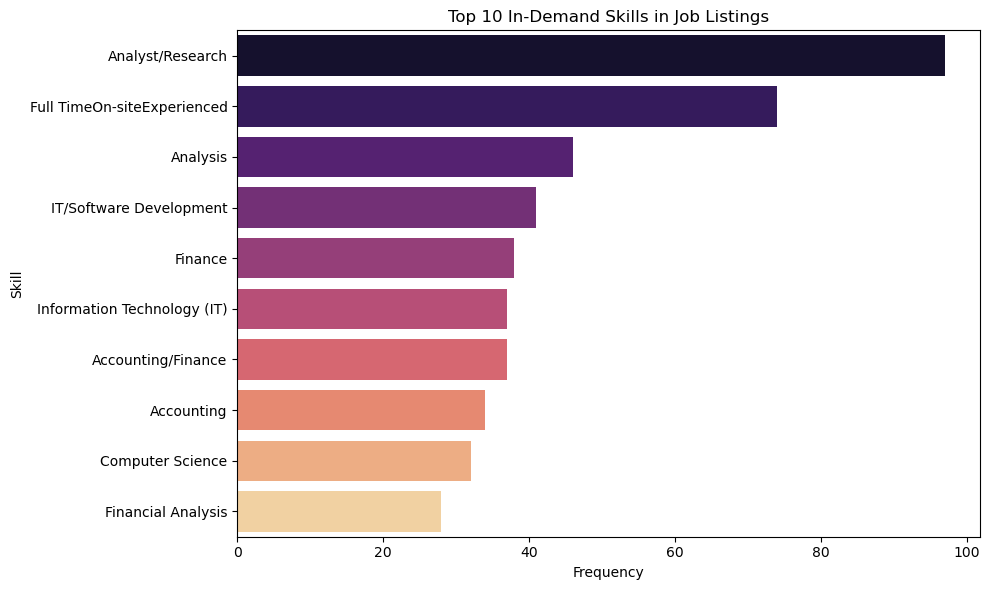

In [49]:
skills, counts = zip(*top_skills)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(skills), hue=list(skills), palette="magma")
plt.title("Top 10 In-Demand Skills in Job Listings")
plt.xlabel("Frequency")
plt.ylabel("Skill")
plt.tight_layout()
plt.show()

# WordCloud - All Skills

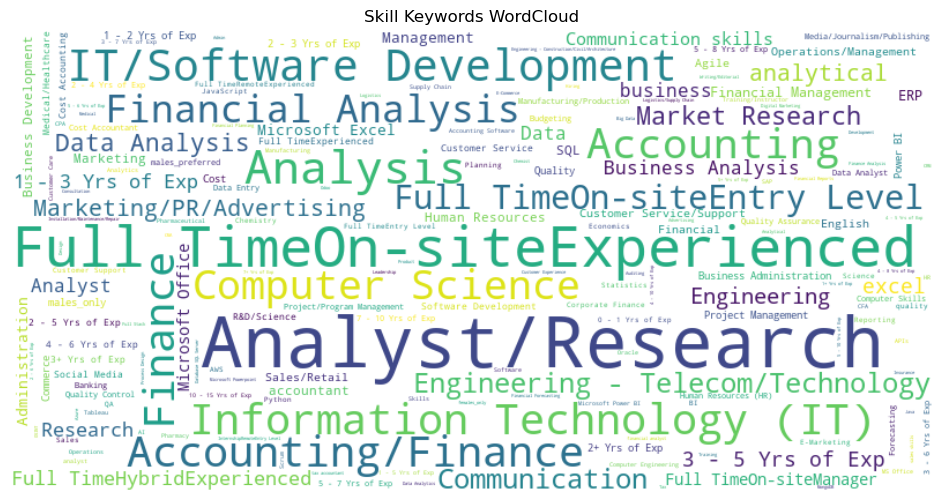

In [52]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(skill_counts)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Skill Keywords WordCloud")
plt.show()

# Count jobs by level

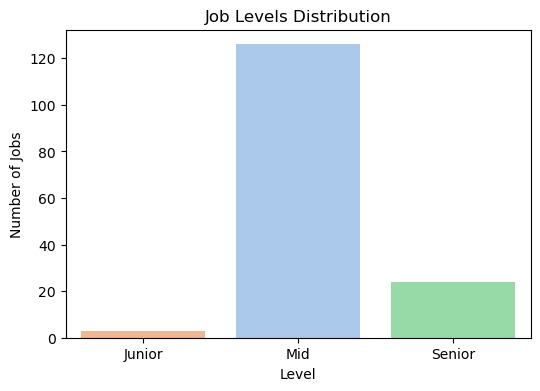

In [54]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Level", hue="Level", palette="pastel",order=["Junior", "Mid", "Senior"])
plt.title("Job Levels Distribution")
plt.xlabel("Level")
plt.ylabel("Number of Jobs")
plt.show()

# Top companies hiring

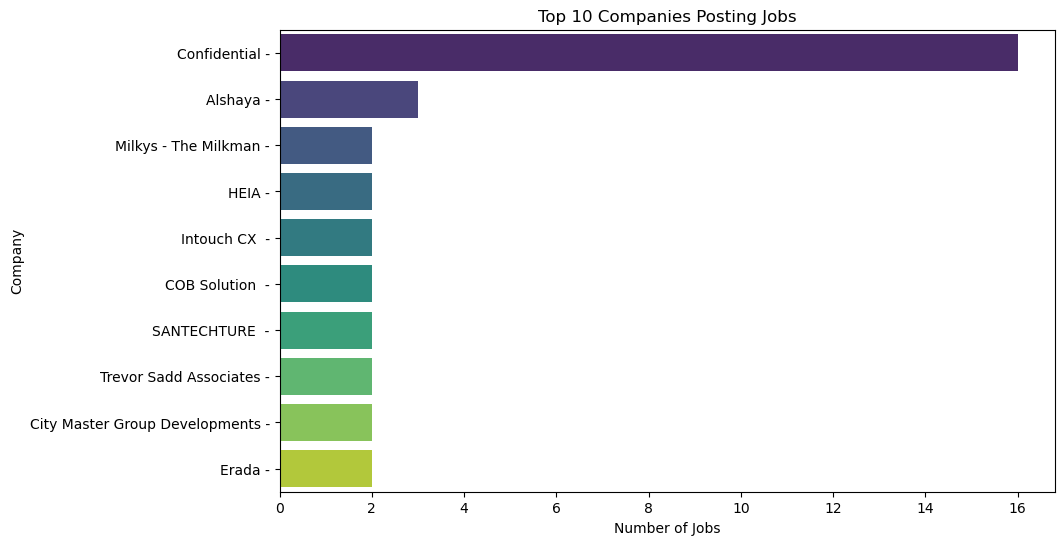

In [58]:
top_companies = df["Company"].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_companies.values, y=top_companies.index, hue=top_companies.index, palette="viridis")
plt.title("Top 10 Companies Posting Jobs")
plt.xlabel("Number of Jobs")
plt.ylabel("Company")
plt.show()

#  Most common cities

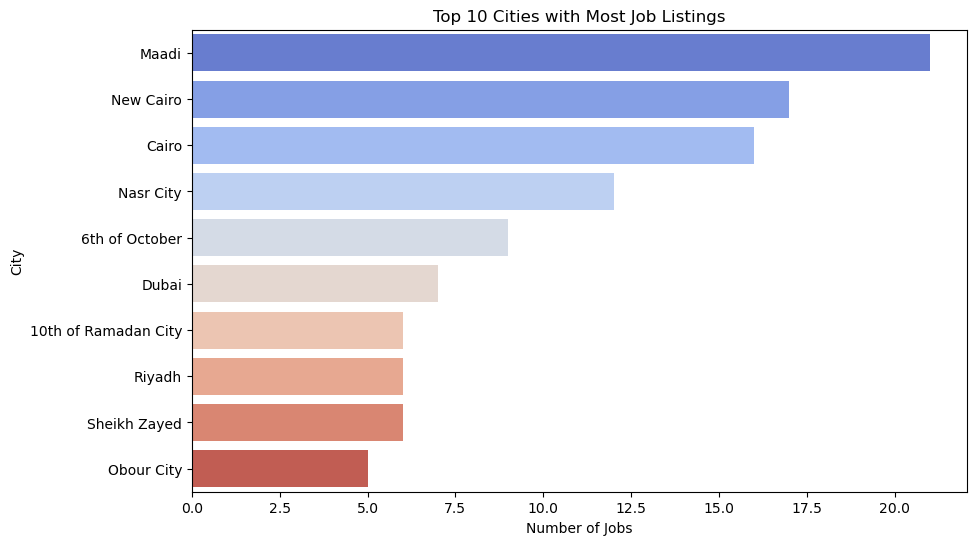

In [64]:
top_cities = df["City"].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, hue=top_cities.index, palette="coolwarm")
plt.title("Top 10 Cities with Most Job Listings")
plt.xlabel("Number of Jobs")
plt.ylabel("City")
plt.show()